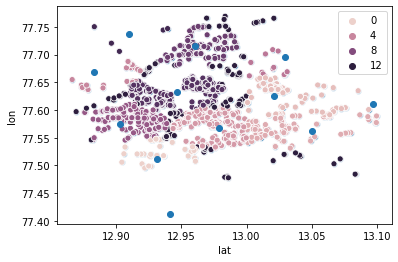

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

region = 'blr'

shops = pd.read_csv(f'csv/{region}/shops.csv')


centers = pd.read_csv(f'data/points.{region}.txt')

sns.scatterplot(x="lat", y="lon", data=shops)


from geopy.distance import geodesic
geodistance = lambda u, v: geodesic(set(u), set(v)).km

y = [len(centers) for i in range(shops.shape[0])]

nodes = shops.values[:, :]

for i in range(shops.shape[0]):
    for j in range(len(centers)):
        if geodistance(nodes[i], centers.values[j, :]) <= 4:
            y[i] = j
            break


centers.values[1, :]

sns.scatterplot(x="lat", y="lon", data=shops, hue=y)

plt.plot(centers.values[:, 0], centers.values[:, 1], 'o')

plt.savefig(f'centers.{region}.png', format='png', dpi='figure', quality=100)